# Exploratory Data Analysis

In [4]:
install.packages('dplyr')
install.packages('quantmod')
install.packages('ggplot2')
install.packages('reshape2')

also installing the dependency 'rlang'




  There are binary versions available but the source versions are later:
      binary source needs_compilation
rlang 0.4.11  1.0.2              TRUE
dplyr  1.0.6  1.0.8              TRUE

  Binaries will be installed
package 'rlang' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\humay\AppData\Local\Temp\Rtmp8kP9J5\downloaded_packages
package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\humay\AppData\Local\Temp\Rtmp8kP9J5\downloaded_packages

  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'



package 'reshape2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\humay\AppData\Local\Temp\Rtmp8kP9J5\downloaded_packages


In [103]:
install.packages('corrplot')
install.packages('corrr')


  There is a binary version available but the source version is later:
         binary source needs_compilation
corrplot   0.88   0.92             FALSE



installing the source package 'corrplot'

also installing the dependencies 'codetools', 'iterators', 'foreach', 'TSP', 'qap', 'cluster', 'gclus', 'registry', 'seriation', 'ggrepel'




  There are binary versions available but the source versions are later:
          binary source needs_compilation
iterators 1.0.13 1.0.14             FALSE
foreach    1.5.1  1.5.2             FALSE
TSP       1.1-10  1.2-0              TRUE
cluster    2.1.2  2.1.3              TRUE
seriation  1.2-9  1.3.5              TRUE

  Binaries will be installed
package 'codetools' successfully unpacked and MD5 sums checked
package 'TSP' successfully unpacked and MD5 sums checked
package 'qap' successfully unpacked and MD5 sums checked
package 'cluster' successfully unpacked and MD5 sums checked
package 'gclus' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'seriation' successfully unpacked and MD5 sums checked
package 'ggrepel' successfully unpacked and MD5 sums checked
package 'corrr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\humay\AppData\Local\Temp\Rtmp8kP9J5\downloaded_packag

installing the source packages 'iterators', 'foreach'



In [104]:
library(dplyr)
library(ggplot2)
library(quantmod)
library(reshape2)
library(corrplot)
library(corrr)

Warning message:
"package 'corrr' was built under R version 3.6.3"

knitr::opts_chunk$set(fig.width=12)

In [8]:
# Import the data and look at the first six rows
ASX200_data <- read.csv(file = 'C:/Users/humay/Downloads/ASX200.csv')
ASX200_data$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
head(ASX200_data)
colnames(ASX200_data)

Month.of.Date,Date,ASX200,X10.AED,X10.CNY,X10.000.IDR,X100.INR,X100.JPY,X1000.KRW,AU.10yr,...,Shanghai,Singapore.1yr,Singapore.30yr,Swiss.1yr,Swiss.30yr,UK.1yr,UK.30yr,US.1yr,US.30yr,USD
July 2010,2010-07-01,4238,0.30724,0.56739,0.7609,0.3904,0.7390,1.02580,5.10,...,2374,0.35,2.98,0.49,1.81,0.71,4.12,0.31,3.90,0.8366
July 2010,2010-07-02,4239,0.31025,0.57224,0.7650,0.3943,0.7433,1.03387,5.12,...,2383,0.35,2.97,0.47,1.81,0.72,4.12,0.31,3.95,0.8448
July 2010,2010-07-03,4239,0.31025,0.57224,0.7650,0.3943,0.7433,1.03387,5.12,...,2383,0.35,2.97,0.47,1.81,0.72,4.12,0.31,3.95,0.8448
July 2010,2010-07-04,4239,0.31025,0.57224,0.7650,0.3943,0.7433,1.03387,5.12,...,2383,0.35,2.97,0.47,1.81,0.72,4.12,0.31,3.95,0.8448
July 2010,2010-07-05,4222,0.31018,0.57217,0.7655,0.3944,0.7429,1.03235,5.07,...,2364,0.35,2.99,0.57,1.80,0.69,4.09,0.31,3.95,0.8446
July 2010,2010-07-06,4276,0.30919,0.57050,0.7636,0.3941,0.7389,1.02956,5.05,...,2409,0.36,2.99,0.54,1.80,0.68,4.13,0.31,3.89,0.8419


[1] "Month.of.Date"  "Date"           "ASX200"         "X10.AED"       
 [5] "X10.CNY"        "X10.000.IDR"    "X100.INR"       "X100.JPY"      
 [9] "X1000.KRW"      "AU.10yr"        "AU.1yr"         "CAC40"         
[13] "China.1yr"      "China.30yr"     "DAX"            "Dow.Jones"     
[17] "EUR"            "FED.rate"       "FTSE100"        "GBP"           
[21] "Germany.1yr"    "Germany.30yr"   "Hang.Seng"      "Hong.Kong.10yr"
[25] "Hong.Kong.1yr"  "Japan.1yr"      "Japan.30yr"     "Korea.1yr"     
[29] "Korea.20yr"     "NASDAQ"         "Nikkei.225"     "RBA.rate"      
[33] "S.P500"         "SGD"            "Shanghai"       "Singapore.1yr" 
[37] "Singapore.30yr" "Swiss.1yr"      "Swiss.30yr"     "UK.1yr"        
[41] "UK.30yr"        "US.1yr"         "US.30yr"        "USD"

## Comparison with other Markets

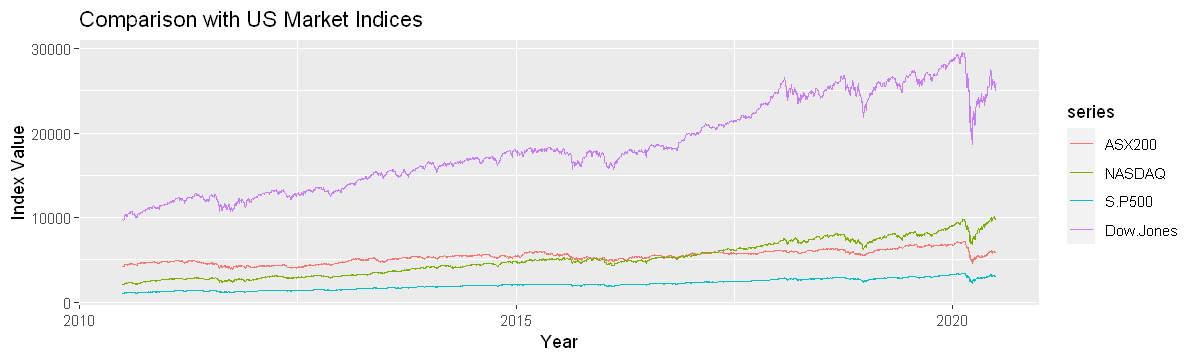

In [9]:
# combine data for ASX200,S&P500, NASDAQ, Dow Jones
df <-subset(ASX200_data, select=c("Date","ASX200", "NASDAQ","S.P500","Dow.Jones"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Index Value", 
              title = "Comparison with US Market Indices")

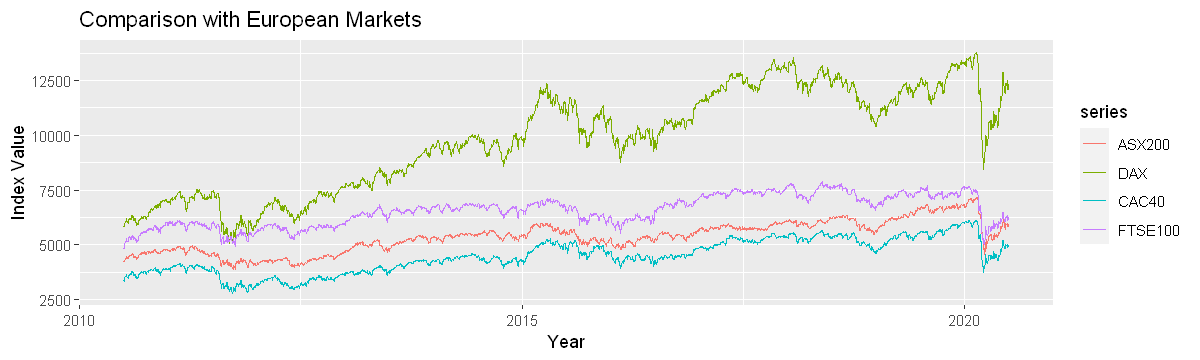

In [10]:
# combine data for ASX200,DAX,CAC40, FTSE100
df <-subset(ASX200_data, select=c("Date","ASX200", "DAX","CAC40","FTSE100"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Index Value", 
              title = "Comparison with European Markets")

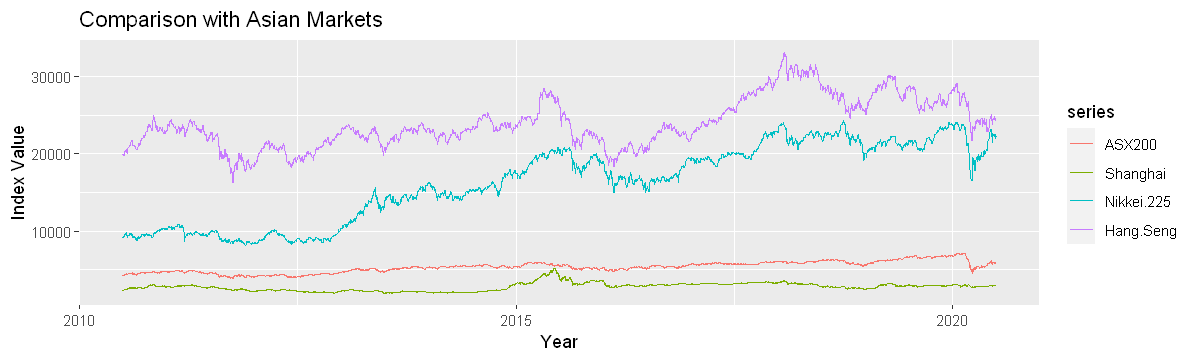

In [11]:
df <-subset(ASX200_data, select=c("Date","ASX200", "Shanghai","Nikkei.225","Hang.Seng"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Index Value", 
              title = "Comparison with Asian Markets")

## Comparison with Currency Exchange Rates

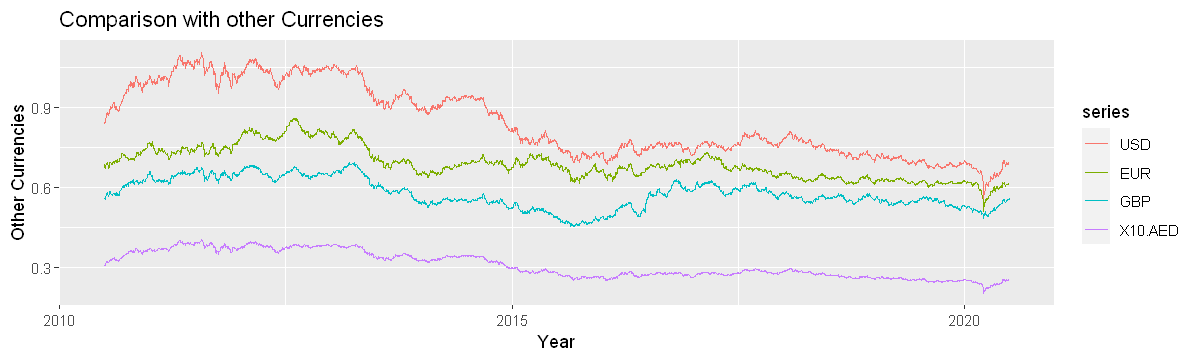

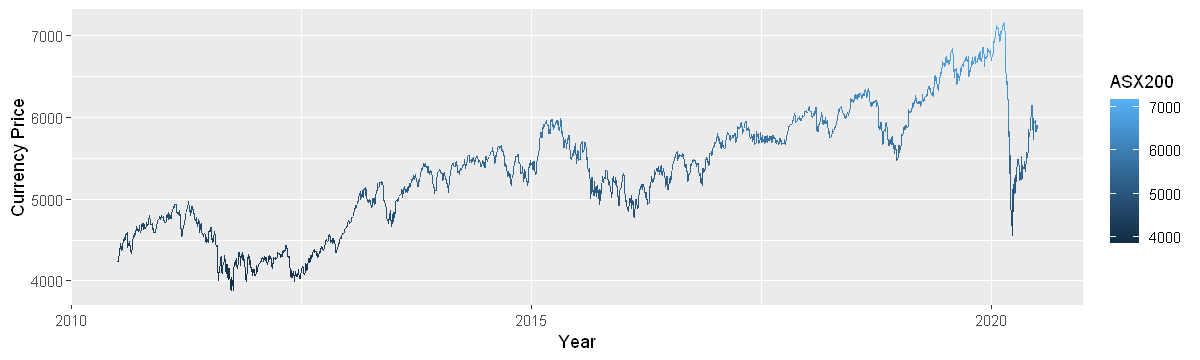

In [12]:
df <-subset(ASX200_data, select=c("Date","USD","EUR","GBP","X10.AED"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
p <- ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Other Currencies", 
              title = "Comparison with other Currencies")
q<-ggplot(ASX200_data,aes(x = Date, y = ASX200,color=ASX200)) + 
         geom_line() +
         labs(x = "Year", y = "Currency Price")

p
q

## Comparison with Risk Free Credit

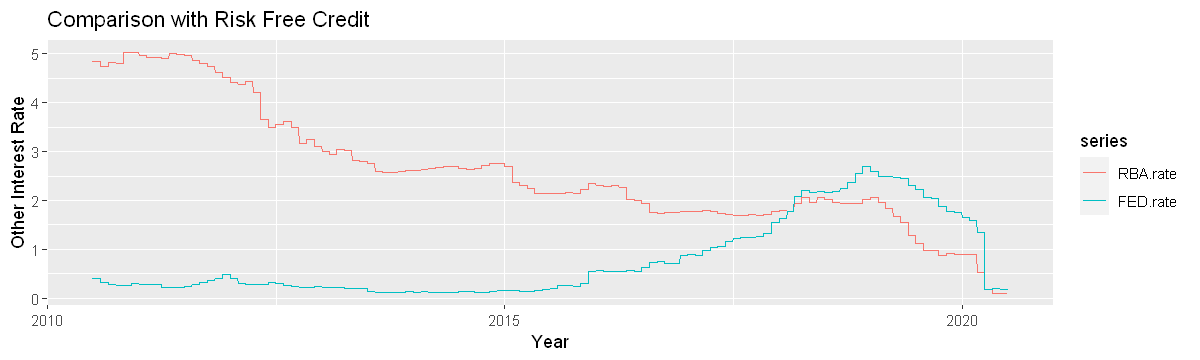

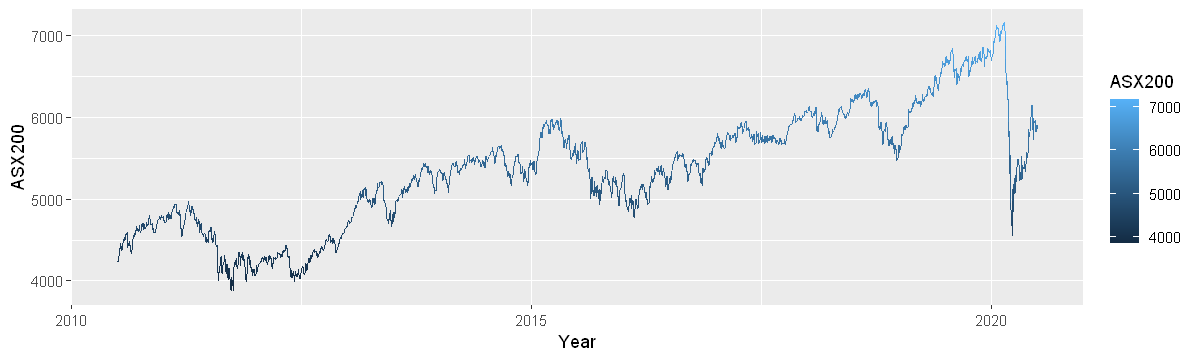

In [89]:
df <-subset(ASX200_data, select=c("Date","RBA.rate","FED.rate"))
df <- melt(df ,  id.vars = 'Date', variable.name = 'series')
df$Date <- as.Date(ASX200_data$Date, format = "%m/%d/%Y")
options(repr.plot.width = 10, repr.plot.height = 3)
p1 <- ggplot(df,aes(x = Date, y = value, color = series,group=series)) + 
         geom_line() +
         labs(x = "Year", y = "Other Interest Rate", 
              title = "Comparison with Risk Free Credit")
q1 <-ggplot(ASX200_data,aes(x = Date, y = ASX200,color=ASX200)) + 
         geom_line() +
         labs(x = "Year", y = "ASX200")

p1
q1

## Correlation

In [14]:
dat <- ASX200_data[, c(3:41)]
df_corr<-round(cor(dat,use="pairwise.complete.obs"), 2)


In [15]:
head(df_corr)

,ASX200,X10.AED,X10.CNY,X10.000.IDR,X100.INR,X100.JPY,X1000.KRW,AU.10yr,AU.1yr,CAC40,...,RBA.rate,S.P500,SGD,Shanghai,Singapore.1yr,Singapore.30yr,Swiss.1yr,Swiss.30yr,UK.1yr,UK.30yr
ASX200,1.00,-0.78,-0.76,0.45,-0.15,-0.13,-0.84,-0.69,-0.74,0.96,...,-0.80,0.93,-0.82,0.44,0.79,-0.15,-0.75,-0.66,0.16,-0.74
X10.AED,-0.78,1.00,0.97,-0.28,0.38,0.38,0.97,0.80,0.84,-0.82,...,0.86,-0.86,0.98,-0.58,-0.78,0.25,0.88,0.84,0.00,0.85
X10.CNY,-0.76,0.97,1.00,-0.41,0.24,0.20,0.97,0.79,0.86,-0.79,...,0.87,-0.83,0.97,-0.55,-0.72,0.16,0.89,0.80,0.04,0.80
X10.000.IDR,0.45,-0.28,-0.41,1.00,0.57,0.46,-0.45,-0.32,-0.49,0.43,...,-0.53,0.46,-0.36,0.04,0.28,0.12,-0.47,-0.25,-0.15,-0.33
X100.INR,-0.15,0.38,0.24,0.57,1.00,0.48,0.27,0.02,-0.09,-0.26,...,-0.06,-0.13,0.28,-0.58,-0.33,-0.01,0.16,0.16,-0.36,0.12
X100.JPY,-0.13,0.38,0.20,0.46,0.48,1.00,0.23,0.40,0.23,-0.14,...,0.19,-0.31,0.34,-0.08,-0.39,0.55,0.15,0.45,-0.13,0.46


In [107]:
df_corr <- dat %>% correlate() %>% focus(ASX200)


Correlation method: 'pearson'
Missing treated using: 'pairwise.complete.obs'



In [108]:
head(df_corr)

term,ASX200
X10.AED,-0.7797898
X10.CNY,-0.7580872
X10.000.IDR,0.4466249
X100.INR,-0.1459542
X100.JPY,-0.1318394
X1000.KRW,-0.8399590


knitr::opts_chunk$set(fig.width=14

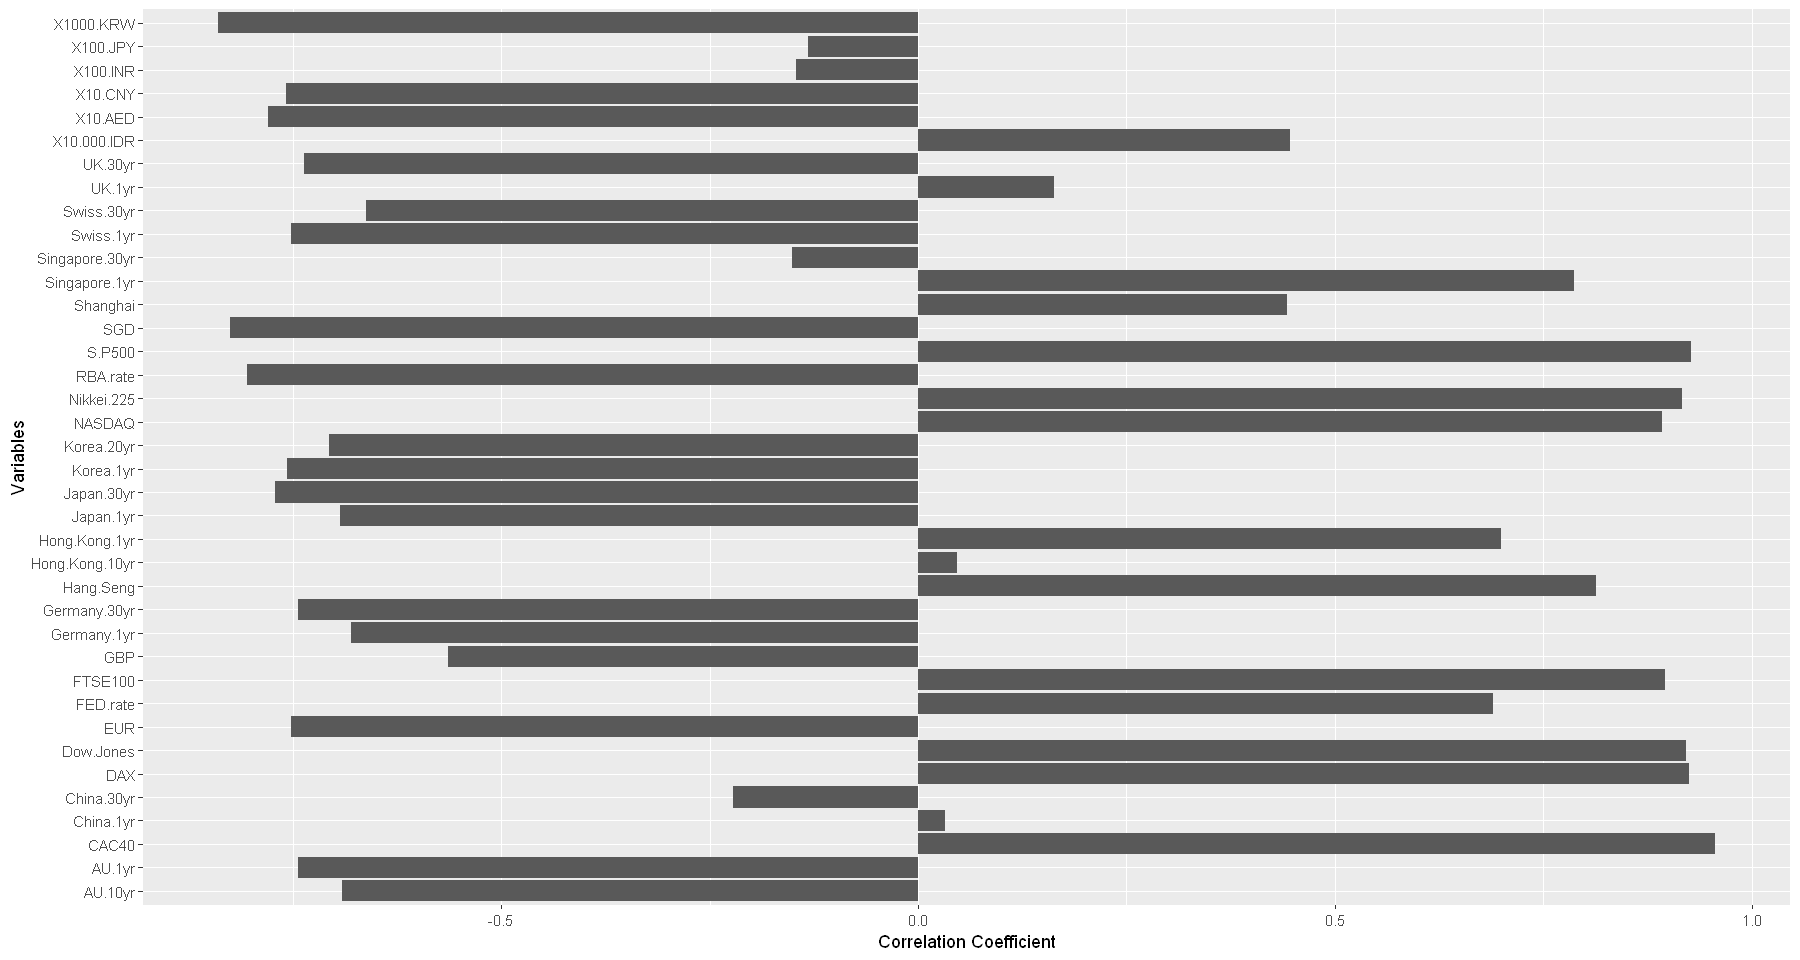

In [120]:
p <- ggplot(df_corr,aes(x = term, y = ASX200)) + 
         geom_bar(stat="identity") +
         labs(x = "Variables", y = "Correlation Coefficient")+
         coord_flip()
p